In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data= pd.read_csv('financial_loan.csv')
df=pd.DataFrame(data)
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [4]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [5]:
df.shape

(38576, 24)

In [6]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [7]:
df['emp_title'].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [8]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [9]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [10]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [11]:
df['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [12]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [13]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


# Data Cleaning

In [14]:
df.isnull()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38574,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

id                       0.000000
address_state            0.000000
application_type         0.000000
emp_length               0.000000
emp_title                3.727706
grade                    0.000000
home_ownership           0.000000
issue_date               0.000000
last_credit_pull_date    0.000000
last_payment_date        0.000000
loan_status              0.000000
next_payment_date        0.000000
member_id                0.000000
purpose                  0.000000
sub_grade                0.000000
term                     0.000000
verification_status      0.000000
annual_income            0.000000
dti                      0.000000
installment              0.000000
int_rate                 0.000000
loan_amount              0.000000
total_acc                0.000000
total_payment            0.000000
dtype: float64

In [17]:
df['emp_title'].isnull().sum()

1438

In [18]:
df.duplicated().sum()

0

In [19]:
df[~df.duplicated()]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [20]:
df['emp_title'].fillna('Not Provided',inplace=True)
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              38576 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [22]:
data=df.to_excel('Cleaned.xlsx')
data

In [23]:
df['loan_amount'].describe()

count    38576.000000
mean     11296.066855
std       7460.746022
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [24]:
df['total_payment'].describe()

count    38576.000000
mean     12263.348533
std       9051.104777
min         34.000000
25%       5633.000000
50%      10042.000000
75%      16658.000000
max      58564.000000
Name: total_payment, dtype: float64

###           Total_Loan_Application


In [25]:
Total_Loan_application =df['loan_amount'].shape[0]
Total_Loan_application

38576

### Total_Funded_Amount

In [26]:
Total_Funded_Amount=df['loan_amount'].sum()
Total_Funded_Amount

435757075

### Total_Amount_Recevied

In [27]:
Total_Amount_Recevied=df['total_payment'].sum()
Total_Amount_Recevied

473070933

### Average_Interest_Rate

In [28]:
Average_Interest_Rate= df['int_rate'].mean()*100
Average_Interest_Rate

12.048831397760265

###  Average_DTI_Rate

In [29]:
Average_DTI_Rate= df['dti'].mean()*100
Average_DTI_Rate

13.327433119037742

### Loan_Status

In [30]:
Loan_Status=df.groupby('loan_status')['loan_amount'].sum()
Loan_Status

loan_status
Charged Off     65532225
Current         18866500
Fully Paid     351358350
Name: loan_amount, dtype: int64

# Good Loans

In [31]:
good_loans_Applications = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')].shape[0]
good_loans_Applications


33243

In [32]:
Good_Loan_Application_percentage=(good_loans_Applications/Total_Loan_application)*100
Good_Loan_Application_percentage

86.17534218166736

In [33]:
good_loan_Funded_Amount = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')]['loan_amount'].sum()
good_loan_Funded_Amount

370224850

In [34]:
good_loan_Recieved_Amount = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')]['total_payment'].sum()
good_loan_Recieved_Amount

435786170

# Bad Loans

In [35]:
Bad_loans_Applications=df[(df['loan_status'] == 'Charged Off')].shape[0]
Bad_loans_Applications

5333

In [36]:
Bad_Loan_Application_percentage=(Bad_loans_Applications/Total_Loan_application)*100
Bad_Loan_Application_percentage

13.824657818332643

In [37]:
Bad_loan_Funded_Amount=df[(df['loan_status'] == 'Charged Off')]['loan_amount'].sum()
Bad_loan_Funded_Amount

65532225

In [38]:
Bad_loan_Recived_Amount=df[(df['loan_status'] == 'Charged Off')]['total_payment'].sum()
Bad_loan_Recived_Amount

37284763

In [39]:
good_loan_Recieved_Amount = (df['term'] == '36 months').value_counts()
good_loan_Recieved_Amount

term
False    38576
Name: count, dtype: int64

In [40]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [41]:
a=(df['term']=='36 months').value_counts().sum()
a

38576

In [42]:
x=df.groupby('term')['loan_amount'].sum()
x

term
36 months    273041225
60 months    162715850
Name: loan_amount, dtype: int64

In [43]:
x2=df.groupby(df['term']=='36 months')['term']
x2

In [44]:
Total_36_monthes_applications = df[(df['term'] == ' 36 months')].value_counts().sum()
Total_36_monthes_applications

28237

In [45]:
Total_36_monthes_percentage =(Total_36_monthes_applications/Total_Loan_application)*100
Total_36_monthes_percentage

73.19836167565326

In [46]:
Total_60_monthes_applications = df[(df['term'] == ' 60 months')].value_counts().sum()
Total_60_monthes_applications

10339

In [47]:
Total_60_monthes_percentage =(Total_60_monthes_applications/Total_Loan_application)*100
Total_60_monthes_percentage

26.801638324346744

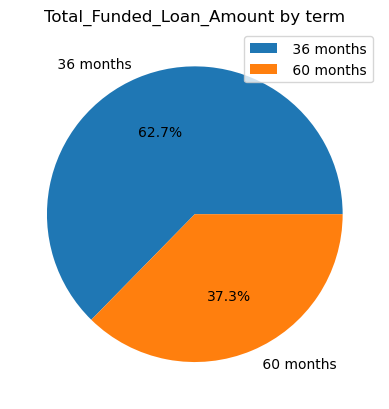

In [48]:

plt.pie(x,labels=df.groupby('term')['loan_amount'].sum().index.tolist(),autopct='%0.1f%%')
plt.legend()
plt.title('Total_Funded_Loan_Amount by term')
plt.show()

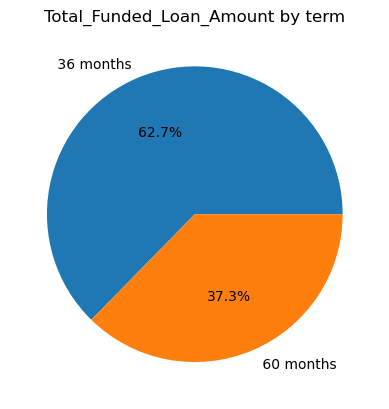

In [58]:

plt.pie(x,labels=df.groupby('term')['total_payment'].sum().index.tolist(),autopct='%0.1f%%')

plt.title('Total_Funded_Loan_Amount by term')
plt.show()

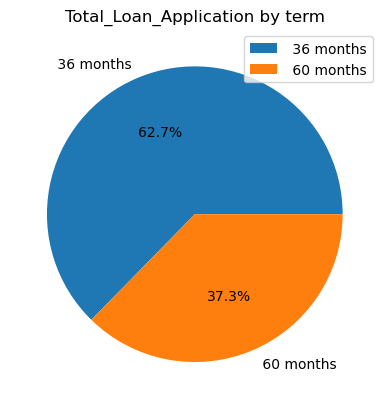

In [50]:
plt.pie(x,labels=df.groupby('term')['loan_amount'].sum().index.tolist(),autopct='%0.1f%%')
plt.legend()
plt.title('Total_Loan_Application by term')
plt.show()

In [51]:
df['loan_status'].value_counts()


loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64